## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [176]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000,15.000,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.000,6
3,4,Female,23.000,16.000,77
4,5,Female,31.000,17.000,40


In [177]:
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [178]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000,15.000,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.000,6
3,4,Female,23.000,16.000,77
4,5,Female,31.000,17.000,40


In [179]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,180.000,180.000,200.000
mean,100.500,39.894,"5,615.433",50.200
std,57.879,16.843,"74,531.116",25.824
min,1.000,18.000,15.000,1.000
25%,50.750,29.000,42.000,34.750
50%,100.500,36.000,61.000,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,135.000,"1,000,000.000",99.000


In [180]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
13,14,Female,24.000,20.000,77
198,199,Male,NaN,137.000,18
123,124,NaN,39.000,NaN,91
35,36,Female,NaN,33.000,81
126,127,Male,43.000,71.000,35
186,187,Female,54.000,NaN,24
136,137,Female,44.000,73.000,7
164,165,Male,50.000,NaN,26
1,2,Male,NaN,NaN,81
134,135,Male,20.000,73.000,5


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [181]:
# Проверка дубликатов
print(df.duplicated().sum())

0


In [182]:
# Проверка количества пропусков в каждом признаке
print(df.isnull().sum())

CustomerID                 0
Gender                    19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


В столбце CustomerID нет дубликатов, и DataFrame уже очищен от любых повторений по этому столбцу, поэтому в дальнейшем дубликаты не ищем и не удаляем, чтобы не исказить модель.

In [183]:
# Удаляем столбец 'CustomerID'
df.drop('CustomerID', axis=1, inplace=True)

In [184]:
# Предварительная проверка уникальных значений в каждом столбце
for col in df.columns:
    print(f"Уникальные значения в столбце {col}: {df[col].unique()}")

Уникальные значения в столбце Gender: ['Male' 'Female' nan 'Feemale']
Уникальные значения в столбце Age: [ 19.  nan  23.  31.  22. 135.  30.  35.  58.  24.  37.  20.  52.  25.
  46.  54.  29.  45.  40.  60.  21.  53.  18.  49.  65.  48.  27.  33.
  59.  50.  47.  51.  69.  70.  67.  63.  43.  68.  32.  26.  57.  38.
  55.  66.  39.  44.  28.  34.  56.  36.  42.  41.]
Уникальные значения в столбце Annual Income (k$): [1.50e+01      nan 1.60e+01 1.70e+01 1.80e+01 1.90e+01 2.00e+01 2.10e+01
 2.30e+01 2.40e+01 2.50e+01 2.80e+01 2.90e+01 3.00e+01 3.30e+01 3.40e+01
 3.70e+01 3.80e+01 3.90e+01 4.00e+01 4.20e+01 4.30e+01 4.40e+01 4.60e+01
 4.70e+01 4.80e+01 4.90e+01 5.00e+01 5.40e+01 5.70e+01 5.80e+01 5.90e+01
 6.00e+01 6.10e+01 6.20e+01 6.30e+01 6.40e+01 6.50e+01 6.70e+01 6.90e+01
 7.00e+01 7.10e+01 7.20e+01 7.30e+01 7.40e+01 7.50e+01 7.60e+01 7.70e+01
 7.80e+01 1.00e+06 7.90e+01 8.10e+01 8.50e+01 8.60e+01 8.70e+01 8.80e+01
 9.30e+01 9.70e+01 9.80e+01 9.90e+01 1.03e+02 1.13e+02 1.20e+02 1.26e

In [185]:
# Сразу преобразуем все аномальные значения
df['Gender'] = df['Gender'].replace({'Feemale': 'Female'})
df['Gender']=df['Gender'].fillna('Unknown')

In [186]:
# Установить формат отображения чисел
pd.options.display.float_format = '{:,.3f}'.format
df['Annual Income (k$)'] = df['Annual Income (k$)'].astype(float)
print(df['Annual Income (k$)'].head())

0   15.000
1      NaN
2   16.000
3   16.000
4   17.000
Name: Annual Income (k$), dtype: float64


In [187]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000,15.000,39
1,Male,NaN,NaN,81
2,Female,NaN,16.000,6
3,Female,23.000,16.000,77
4,Female,31.000,17.000,40


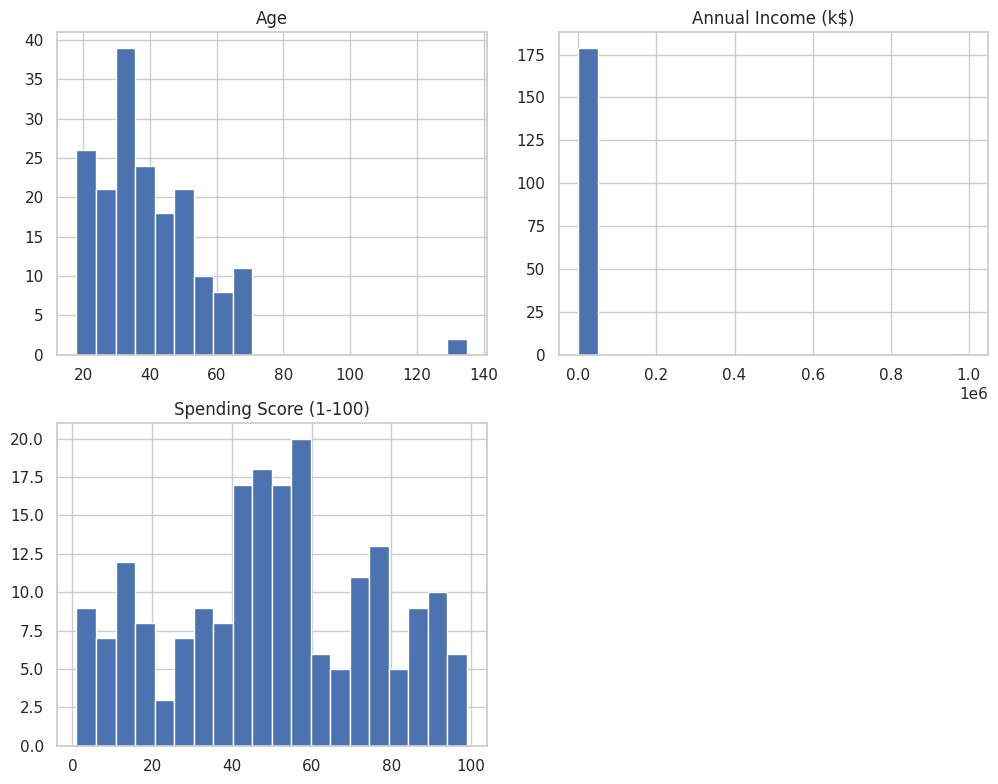

In [188]:
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [189]:
# Разделение на признаки (X) и целевую переменную (y)
# Cоздаем новую переменную X, которая содержит все столбцы из датафрейма df, кроме столбца 'Spending Score (1-100)'
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']
# Разделение данных на обучающую и тестовую выборки (80%/20%)
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=1)
# Проверка форматов данных
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (40, 3)
X_test shape: (160, 3)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [190]:
# Для числовых признаков (возраст, годовой доход)
numeric_imputer = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_train[['Age', 'Annual Income (k$)']])
# Для категориальных признаков (возраст)
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train['Gender'] = categorical_imputer.fit_transform(X_train[['Gender']].values.reshape(-1, 1)).ravel()
# Проверка, что пропусков больше нет
print(X_train.isnull().sum())

Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64


  Age и Annual Income (k$): Медиана является устойчивой к выбросам и лучше отражает центральное положение данных, особенно если в признаке наблюдаются аномальные значения.

  Genre: Для категориального признака разумно использовать моду, так как это минимизирует влияние отсутствующих данных и сохраняет распределение категорий.

In [191]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000,15.000,39
1,Male,NaN,NaN,81
2,Female,NaN,16.000,6
3,Female,23.000,16.000,77
4,Female,31.000,17.000,40


In [192]:
X_test.describe()

,Age,Annual Income (k$)
count,145.000,142.000
mean,39.828,"7,101.739"
std,17.689,"83,913.112"
min,18.000,15.000
25%,29.000,43.250
50%,37.000,62.000
75%,48.000,77.000
max,135.000,"1,000,000.000"


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


В описании данных видно, что существует аномальный выброс: возраст больше 100 лет.  Возможно произвести замену на моду или медиану или на среднее значение.
 Выбор метода обнаружения выбросов: Мы используем метод IQR, который основан на межквартильном диапазоне. Выбросы определяются как значения, выходящие за пределы 1.5 * IQR ниже первого квартиля (Q1) и выше третьего квартиля (Q3).

Обработка выбросов:  выбросы можно заменить на границы (либо Q1 - 1.5 * IQR, либо Q3 + 1.5 * IQR).

In [193]:
# Определяем аномальные значения в возрасте
anomalous_ages=X_test[X_test['Age'] >100]
print(f"Аномальные значения возраста:\n {anomalous_ages}")

Аномальные значения возраста:
     Gender     Age  Annual Income (k$)
6  Unknown 135.000              18.000
8     Male 135.000              19.000


In [194]:
# Находим медиану для возраста
mode_age=X_test['Age'].mode()[0]
print(f"Мода возраста: {mode_age}")
# Заменяем аномальные значения на моду
X_train.loc[X_train['Age'] >100, 'Age'] = mode_age
print(X_train[X_train['Age'] >100])

Мода возраста: 32.0
Empty DataFrame
Columns: [Gender, Age, Annual Income (k$)]
Index: []


При обработке аномальных значений для признака, такого как годовой доход, важно учитывать контекст и понимание данных: сложно принять решение (по удалению или замене) т.к. про возраст точно кто-то пошутил или ошибся, а доход может быть аномально высоким.

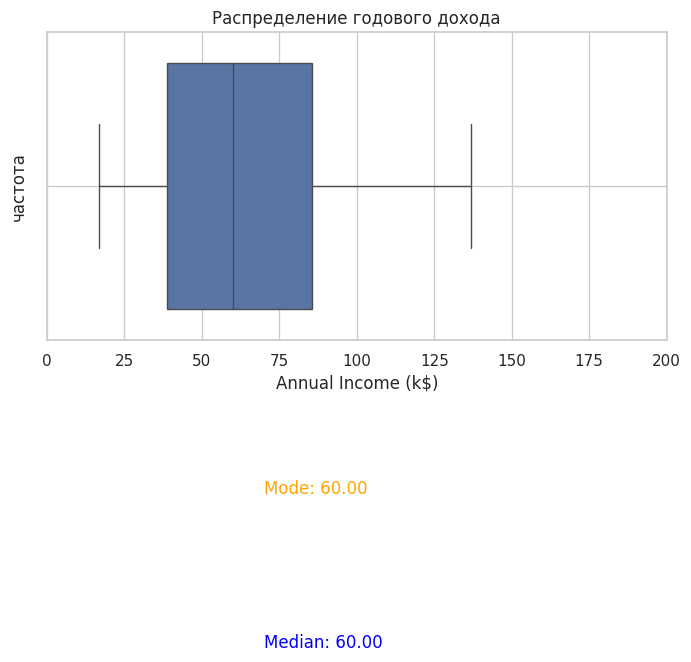

In [195]:
plt.figure(figsize=(8, 4))
ax=sns.boxplot(x=X_train['Annual Income (k$)'])
# Вычисление медианы и моды
median_income = X_train['Annual Income (k$)'].median()
mode_income = X_train['Annual Income (k$)'].mode()[0] # Используем первый элемент, если несколько мод
# Установка границ оси X
plt.xlim(0, 200)
# Аннотация для медианы
def annotation(ax=ax, name='Median', xy=median_income, color='blue', begin=1.5):
  ax.annotate(f'{name}: {xy:.2f}', xy=(xy, 0.5),
              xytext=(xy+10, begin),
              arrowprops=dict(arrowstyle='->', lw=1.5),
              fontsize=12, color=color)
annotation()
# Аннотация для моды
annotation(name='Mode', xy=mode_income, color='orange', begin=1)
# Заголовок и подписи
plt.title('Распределение годового дохода')
plt.xlabel('Annual Income (k$)')
plt.ylabel('частота')
plt.grid(True)
plt.show()


In [196]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19.000,15.000,39
1,Male,NaN,NaN,81
2,Female,NaN,16.000,6
3,Female,23.000,16.000,77
4,Female,31.000,17.000,40


In [197]:
# Установка порогового значения для аномально высокого дохода
highest_income = 90
# Фильтрация данных по условию
high_income_data =df[df['Annual Income (k$)'] > highest_income]
print(f"Количество клиентов с аномально высоким доходом: {len(high_income_data)}")
# Фильтрация данных по условию
hight_income_age_over_80 = df[(df['Annual Income (k$)'] > highest_income) & (df['Age'] >80)]
print(f"Количество клиентов с аномально высоким доходом и возрастом больше 80: {len(hight_income_age_over_80)}")
print(f'Информацию о таких клиентах\n {hight_income_age_over_80}')



Количество клиентов с аномально высоким доходом: 19
Количество клиентов с аномально высоким доходом и возрастом больше 80: 0
Информацию о таких клиентах
 Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.

count   40.000
mean    39.698
std     11.937
min     23.950
25%     31.750
50%     36.000
75%     49.000
max     65.000
Name: Age, dtype: float64


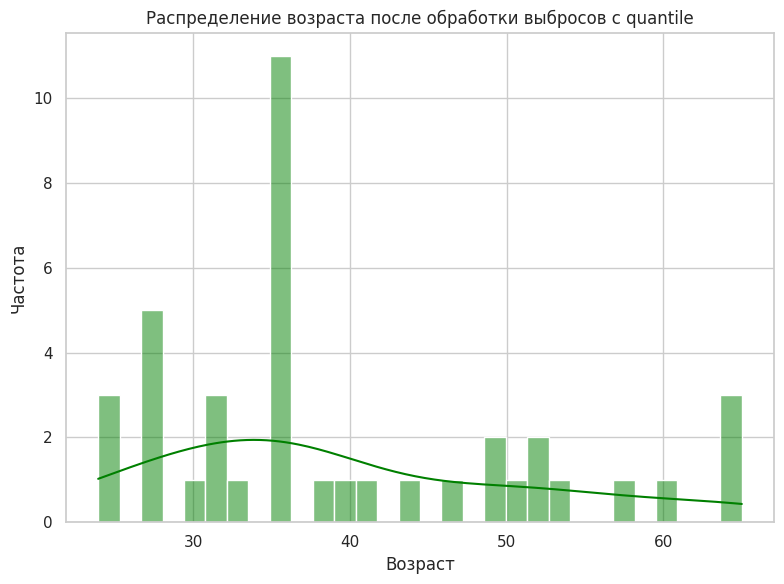

In [198]:
# Предположим, что X_train уже загружен и содержит столбец 'Age'
def anomalous_ages_histogramm (X_analis=X_train):
    # Проверка на наличие пропусков
    if X_analis['Age'].isnull().sum() >0:
        print("В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.")

    # Определение нижней и верхней границ выбросов с помощью квантилей
    lower_bound_age = X_analis['Age'].quantile(0.05)  # 5-й процентиль
    upper_bound_age = X_analis['Age'].quantile(0.95)  # 95-й процентиль

    # Замена значений ниже 5-го и выше 95-го процентилей на соответствующие квантильные значения
    X_analis.loc[X_analis['Age'] < lower_bound_age, 'Age'] = lower_bound_age
    X_analis.loc[X_analis['Age'] > upper_bound_age, 'Age'] = upper_bound_age
    # Проверка результата
    print(X_analis['Age'].describe())
    # Визуализация распределения возраста после обработки
    plt.figure(figsize=(8, 6))
    sns.histplot(X_analis['Age'], bins=30, kde=True, color='green')
    plt.title('Распределение возраста после обработки выбросов с quantile')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()
    return X_analis

X_train=anomalous_ages_histogramm()


count    40.000
mean     60.517
std      27.170
min      17.000
25%      38.750
50%      60.000
75%      85.500
max     113.350
Name: Annual Income (k$), dtype: float64


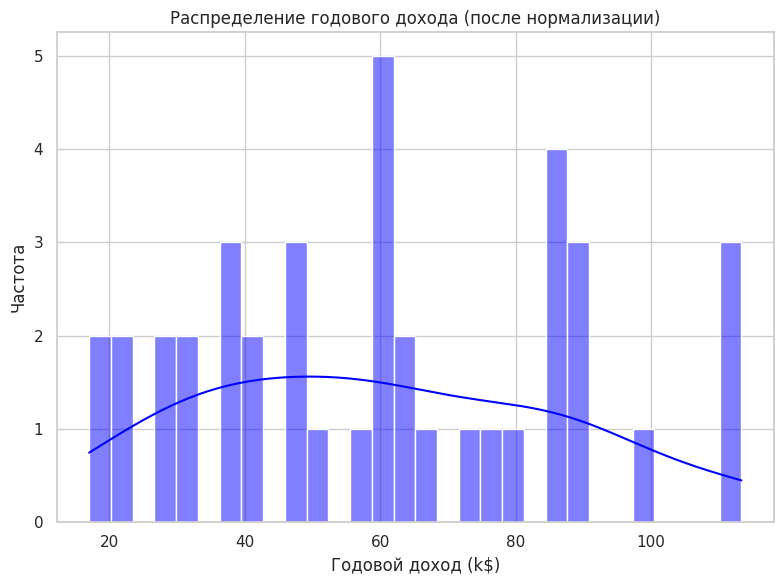

In [199]:
# Определение 95-го процентиля для годового дохода
def anomalous_income_histogramm (X_analis=X_train):
    income_upper_limit = X_analis['Annual Income (k$)'].quantile(0.95)
    # Замена значений выше 95-го процентиля на это значение
    X_analis.loc[X_analis['Annual Income (k$)'] > income_upper_limit, 'Annual Income (k$)'] = income_upper_limit
    # Проверка результата
    print(X_analis['Annual Income (k$)'].describe())
    # Настройка стиля
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 6))
    # График распределения годового дохода после нормализации
    sns.histplot(X_analis['Annual Income (k$)'], bins=30, kde=True, color='blue')
    plt.title('Распределение годового дохода (после нормализации)')
    plt.xlabel('Годовой доход (k$)')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()
    return X_analis

X_train=anomalous_income_histogramm()

         Age  Annual Income (k$)
count 40.000              40.000
mean  -0.000               0.000
std    1.013               1.013
min   -1.336              -1.622
25%   -0.674              -0.811
50%   -0.314              -0.019
75%    0.789               0.931
max    2.147               1.969


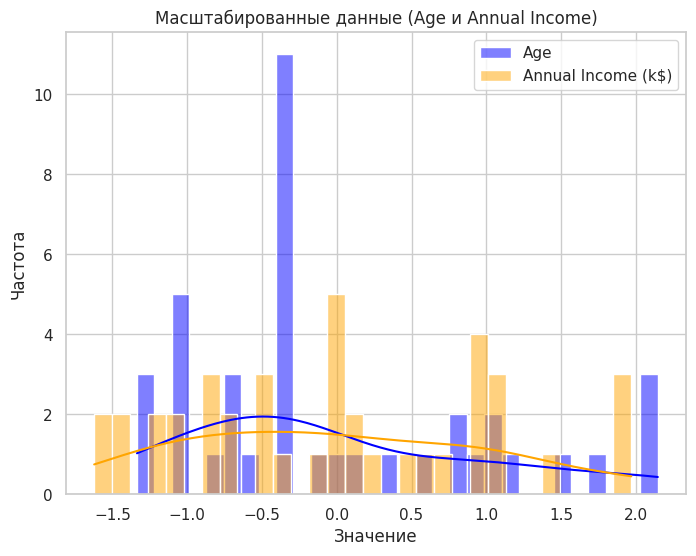

In [200]:
def show_histogramm (X_analis=X_train):
    # Создаем экземпляр StandardScaler
    scaler = StandardScaler()

    # Применяем масштабирование только к числовым признакам (например, 'Age' и 'Annual Income (k$)')
    X_analis[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_analis[['Age', 'Annual Income (k$)']])

    # Проверяем результаты
    print(X_analis[['Age', 'Annual Income (k$)']].describe())

    # Визуализация масштабированных данных
    plt.figure(figsize=(8, 6))
    sns.histplot(X_analis['Age'], bins=30, kde=True, color='blue', label='Age')
    sns.histplot(X_analis['Annual Income (k$)'], bins=30, kde=True, color='orange', label='Annual Income (k$)')
    plt.title('Масштабированные данные (Age и Annual Income)')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()
    return X_analis


X_train=show_histogramm()

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [201]:
def inputer_encoding(X_analis=X_train):
  # Заменяем значения "Unknown" на NaN с использованием mask
  X_analis['Gender']=X_analis['Gender'].mask(X_analis['Gender'] == 'Unknown', np.nan)
  imputer = SimpleImputer(strategy='most_frequent')
  X_analis['Gender'] = imputer.fit_transform(X_analis[['Gender']]).ravel()
  lb=LabelEncoder()
  X_analis['Gender']=lb.fit_transform(X_analis['Gender'])
  # Проверка результата
  print(X_analis.head())
  print("\nКоличество пропусков в каждом признаке:")
  print(X_analis.isnull().sum())

  for column in X_analis.columns:
      print(f"\nУникальные значения в столбце {column}: {X_analis[column].unique()}\n")

  display(X_analis.head(10))
  return X_analis

X_train=inputer_encoding()


     Gender    Age  Annual Income (k$)
58        0 -1.077              -0.541
40        0  2.147              -0.839
34        0  0.789              -1.026
102       1  2.147               0.055
184       0  0.111               1.434

Количество пропусков в каждом признаке:
Gender                0
Age                   0
Annual Income (k$)    0
dtype: int64

Уникальные значения в столбце Gender: [0 1]


Уникальные значения в столбце Age: [-1.07722577  2.14660405  0.78920202  0.11050101 -0.31368713 -1.33173865
 -0.73787526 -1.33598053 -0.99238814  1.0437149  -0.39852475  0.95887728
 -0.82271289  0.36501389  1.12855253 -0.56820001 -0.65303763  0.02566338
 -0.14401187  0.61952677  1.55274067  1.72241592]


Уникальные значения в столбце Annual Income (k$): [-0.54113175 -0.8393273  -1.02569952  0.05525936  1.43441381  1.96930208
 -0.01928952 -1.62209064 -1.1747973   0.98712047 -1.39844397 -1.54754175
 -0.09383841  0.09253381  0.24163159  0.65165047  0.46527825 -0.69022952
 -1.47299286 -0.80

,Gender,Age,Annual Income (k$)
58,0,-1.077,-0.541
40,0,2.147,-0.839
34,0,0.789,-1.026
102,1,2.147,0.055
184,0,0.111,1.434
198,1,-0.314,1.969
95,0,-1.332,-0.019
4,0,-0.738,-1.622
29,0,-1.336,-1.175
168,0,-0.314,0.987


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

В данных есть пропуски в столбце 'Age'. Рекомендуется заполнить их перед обработкой выбросов.
count   145.000
mean     38.862
std      13.860
min      19.000
25%      29.000
50%      37.000
75%      48.000
max      67.000
Name: Age, dtype: float64


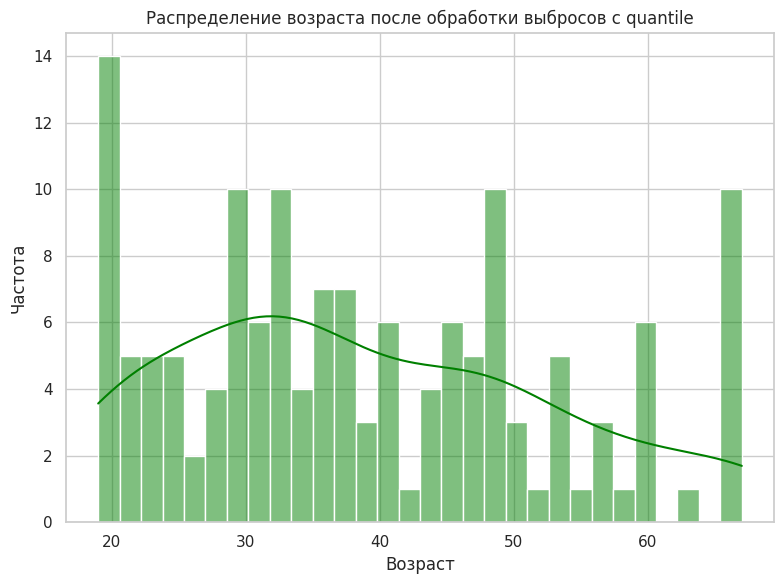

In [202]:
X_test=anomalous_ages_histogramm(X_test)

count   142.000
mean     59.528
std      23.907
min      15.000
25%      43.250
50%      62.000
75%      77.000
max     103.000
Name: Annual Income (k$), dtype: float64


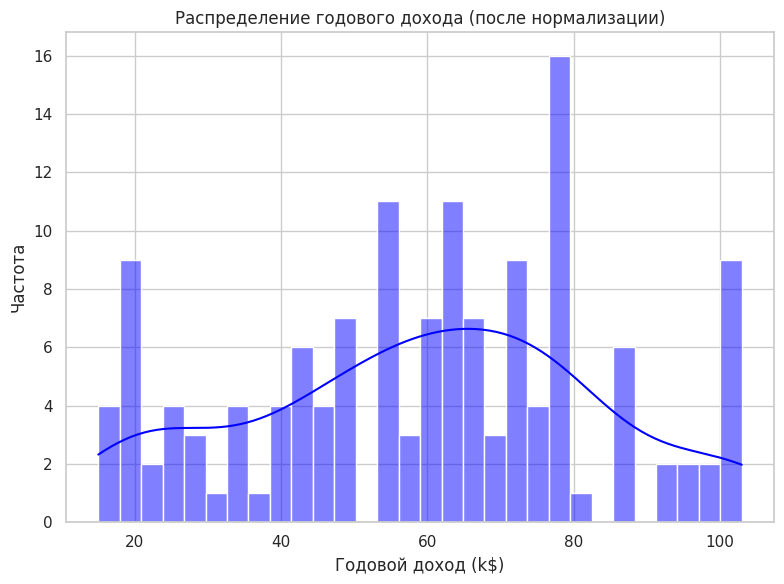

In [203]:
X_test=anomalous_income_histogramm(X_test)

          Age  Annual Income (k$)
count 145.000             142.000
mean    0.000               0.000
std     1.003               1.004
min    -1.438              -1.869
25%    -0.714              -0.683
50%    -0.135               0.104
75%     0.662               0.733
max     2.037               1.825


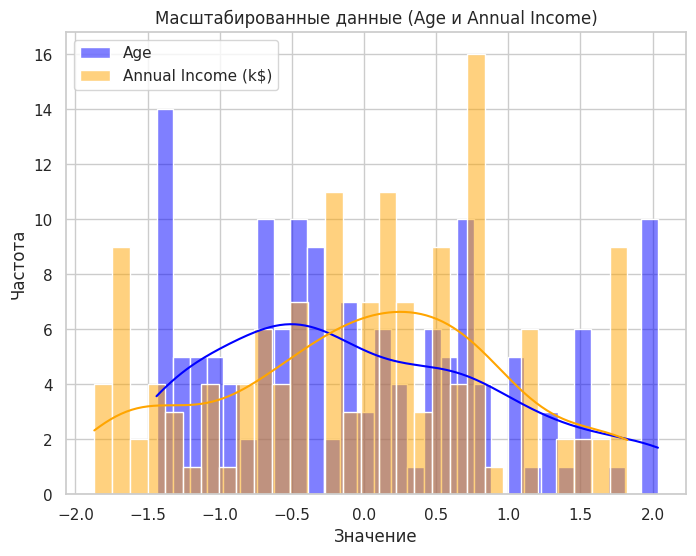

In [204]:
X_test=show_histogramm(X_test)

In [205]:
X_test=inputer_encoding(X_test)

     Gender    Age  Annual Income (k$)
108       1  2.037               0.146
107       1  1.096               0.146
189       0 -0.207               1.825
14        1 -0.135              -1.659
56        0  0.879              -0.652

Количество пропусков в каждом признаке:
Gender                 0
Age                   15
Annual Income (k$)    18
dtype: int64

Уникальные значения в столбце Gender: [1 0]


Уникальные значения в столбце Age: [ 2.03723125  1.09601044 -0.20721837 -0.13481677  0.87880564 -0.27961998
 -1.43804559 -1.36564399 -0.64162798 -1.14843918  0.66160083  0.00998643
  0.80640404  1.45801844 -0.49682478         nan -1.22084078  0.08238803
 -1.29324238 -0.71402958  0.29959283 -0.35202158  0.22719123  1.38561684
  0.73400243 -0.85883278  0.58919923 -0.06241517 -1.07603758 -1.00363598
 -0.78643118 -0.93123438  0.37199443 -0.42442318  1.24081364  1.02360884
  0.51679763 -0.56922638  0.15478963  1.74762484  1.96482965  1.31321524
  0.44439603  1.53042004  1.16841204]


Уник

,Gender,Age,Annual Income (k$)
108,1,2.037,0.146
107,1,1.096,0.146
189,0,-0.207,1.825
14,1,-0.135,-1.659
56,0,0.879,-0.652
19,0,-0.280,-1.533
114,0,-1.438,0.230
39,0,-1.366,NaN
185,0,-0.642,1.657
124,0,-1.148,0.440
